In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
acc_df = pd.read_csv("../eval/fit_ranges/acc_ref_df.csv")

dfs = []
for filename in ["split_1.csv","split_2.csv"]:
    dfs.append(pd.read_csv(f"../eval/quantifications/ranges/range_{filename}"))
df =pd.concat(dfs,sort=False)

acc_df = acc_df[acc_df["filename"].isin(list(df["filename"].unique()))]
ref_df = pd.read_csv("../pre_results/full_ref_df.csv")

In [4]:
### acc

i_df = acc_df.copy()

i_df = pd.merge(i_df,ref_df,on="filename",suffixes=("_acc","_ref"))

metric = "gaba_conc_cr"
i_df["abs_diff_mean"] = abs(i_df[f"{metric}_acc"] - i_df[f"{metric}_ref"])
i_df["ref"] = i_df[f"{metric}_ref"]
i_df["mean"] = i_df[f"{metric}_acc"]
i_df["std"] = i_df[f"{metric}_acc"]
a_df = i_df.groupby("filename").agg({"ref":"mean","mean":"mean","std":"std","abs_diff_mean":"mean"})
print(a_df.median())

ref              0.114098
mean             0.114725
std              0.010074
abs_diff_mean    0.008339
dtype: float64


In [5]:
### model

i_df = df.copy()

i_df = pd.merge(i_df,ref_df,on="filename",suffixes=("_model","_ref"))

metric = "gaba_conc_cr"
i_df["abs_diff_mean"] = abs(i_df[f"{metric}_model"] - i_df[f"{metric}_ref"])
i_df["ref"] = i_df[f"{metric}_ref"]
i_df["mean"] = i_df[f"{metric}_model"]
i_df["std"] = i_df[f"{metric}_model"]
a_df = i_df.groupby("filename").agg({"ref":"mean","mean":"mean","std":"std","abs_diff_mean":"mean"})
print(a_df.median())

ref              0.114098
mean             0.106700
std              0.035744
abs_diff_mean    0.045391
dtype: float64


   filename  abs_diff_mean_mod  abs_diff_mean_acc
25  p10_s02           0.899511           1.306358
30   p4_s01           0.829886           0.009087
43   p8_s02           0.668308           0.004648
44   p8_s03           0.626525           0.004480
24  p10_s01           0.606793           0.004192
..      ...                ...                ...
46   p8_s11           0.005001           0.002252
47   p8_s12           0.004809           0.003235
45   p8_s10           0.004469           0.005820
10   g5_s11           0.003944           0.005558
58   s3_s11           0.003060           0.003381

[72 rows x 3 columns]


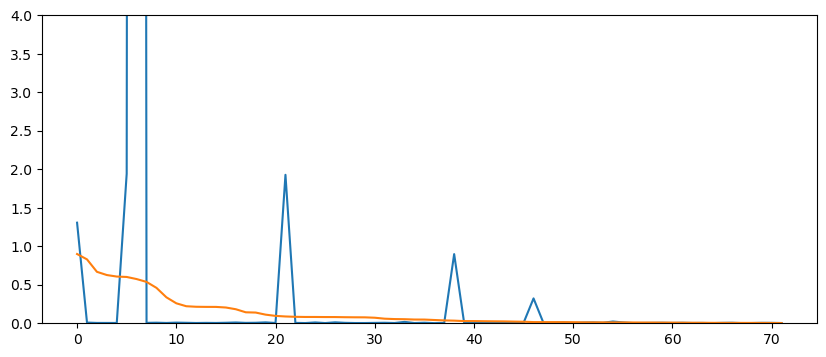

In [13]:
### acc

i_acc_df = acc_df.copy()

i_acc_df = pd.merge(i_acc_df,ref_df,on="filename",suffixes=("_acc","_ref"))

metric = "gaba_conc_cr"
calc="mean"

i_acc_df["abs_diff_mean"] = abs(i_acc_df[f"{metric}_acc"] - i_acc_df[f"{metric}_ref"])
out_acc_df = i_acc_df.groupby("filename").agg({"abs_diff_mean":"std"}).reset_index()

i_mod_df = df.copy()

i_mod_df = pd.merge(i_mod_df,ref_df,on="filename",suffixes=("_acc","_ref"))

i_mod_df["abs_diff_mean"] = abs(i_mod_df[f"{metric}_acc"] - i_mod_df[f"{metric}_ref"])
out_mod_df = i_mod_df.groupby("filename").agg({"abs_diff_mean":"mean"}).reset_index()


out_df = pd.merge(out_mod_df,out_acc_df,on="filename",suffixes=("_mod","_acc"))
out_df = out_df.sort_values("abs_diff_mean_mod",ascending=False)

print(out_df)
fig,ax = plt.subplots(figsize=(10,4))

acc_v = out_df["abs_diff_mean_acc"].values
mod_v = out_df["abs_diff_mean_mod"].values

ax.plot(np.arange(acc_v.shape[0]),acc_v,label="acc")
ax.plot(np.arange(mod_v.shape[0]),mod_v,label="model")

ax.set_ylim(0,4)

plt.show()



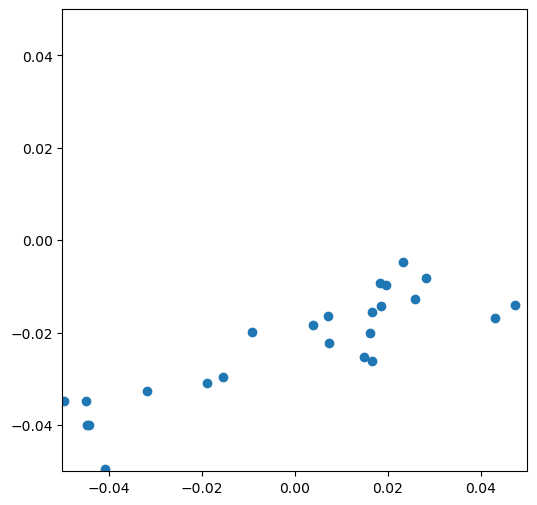

In [15]:


idx = 6
filter_filename = list(df["filename"].unique())[idx]
metric = "gaba_conc_cr"


i_acc_df = acc_df[acc_df["filename"]==filter_filename].copy()
i_acc_df = pd.merge(i_acc_df,ref_df,on="filename",suffixes=("_acc","_ref"))
i_acc_df["error"] = i_acc_df[f"{metric}_acc"] - i_acc_df[f"{metric}_ref"]

i_mod_df = df[df["filename"]==filter_filename].copy()
i_mod_df = pd.merge(i_mod_df,ref_df,on="filename",suffixes=("_acc","_ref"))
i_mod_df["error"] = i_mod_df[f"{metric}_acc"] - i_mod_df[f"{metric}_ref"]

#print(i_acc_df)
#print(i_mod_df)

out_df = pd.merge(i_acc_df,i_mod_df,on=["filename","range"],suffixes=("_acc","_model"))
#print(out_df)

fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(out_df["error_acc"],out_df["error_model"])
bound=0.05
ax.set_xlim(-bound,bound)
ax.set_ylim(-bound,bound)
plt.show()

In [3]:
for i in range(21,22):
    idx = i
    filter_filename = list(df["filename"].unique())[idx]
    metric = "gaba_conc_cr"

    print(filter_filename)
    i_acc_df = acc_df[acc_df["filename"]==filter_filename].copy()
    i_acc_df = pd.merge(i_acc_df,ref_df,on="filename",suffixes=("_acc","_ref"))
    i_acc_df["error"] = i_acc_df[f"{metric}_acc"] - i_acc_df[f"{metric}_ref"]
    i_acc_df["abs_error"] = abs(i_acc_df["error"])

    i_mod_df = df[df["filename"]==filter_filename].copy()
    i_mod_df = pd.merge(i_mod_df,ref_df,on="filename",suffixes=("_acc","_ref"))
    i_mod_df["error"] = i_mod_df[f"{metric}_acc"] - i_mod_df[f"{metric}_ref"]
    i_mod_df["abs_error"] = abs(i_mod_df["error"])

    out_df = pd.merge(i_acc_df,i_mod_df,on=["filename","range"],suffixes=("_acc","_model"))

    print(f"Range => Model: {i_mod_df['error'].max()-i_mod_df['error'].min()} | Acc: {i_acc_df['error'].max()-i_acc_df['error'].min()}")
    print(f"Mean Error => Model: {i_mod_df['error'].mean()} | Acc: {i_acc_df['error'].mean()}")
    print(f"Std Error => Model: {i_mod_df['error'].std()} | Acc: {i_acc_df['error'].std()}")
    print(f"Mean Abs Error => Model: {i_mod_df['abs_error'].mean()} | Acc: {i_acc_df['abs_error'].mean()}")
    print("--------------------------")

p10_s10
Range => Model: 0.0406967178243166 | Acc: 0.042397521842718694
Mean Error => Model: -0.02205879353143812 | Acc: -0.0001306675452998207
Std Error => Model: 0.010616204061252613 | Acc: 0.010814397419758575
Mean Abs Error => Model: 0.02205879353143812 | Acc: 0.008303985260481322
--------------------------


In [16]:
#### g_df

outlier_std_tresh=3
pre_g_df=[]

for i in range(36):
    idx = i
    filter_filename = list(df["filename"].unique())[idx]
    metric = "gaba_conc_cr"

    #print(filter_filename)
    i_acc_df = acc_df[acc_df["filename"]==filter_filename].copy()
    i_acc_df = pd.merge(i_acc_df,ref_df,on="filename",suffixes=("_acc","_ref"))
    i_acc_df["error"] = i_acc_df[f"{metric}_acc"] - i_acc_df[f"{metric}_ref"]
    i_acc_df["abs_error"] = abs(i_acc_df["error"])

    i_mod_df = df[df["filename"]==filter_filename].copy()
    i_mod_df = pd.merge(i_mod_df,ref_df,on="filename",suffixes=("_acc","_ref"))
    i_mod_df["error"] = i_mod_df[f"{metric}_acc"] - i_mod_df[f"{metric}_ref"]
    i_mod_df["abs_error"] = abs(i_mod_df["error"])

    out_df = pd.merge(i_acc_df,i_mod_df,on=["filename","range"],suffixes=("_acc","_model"))

    model_error=i_mod_df['error'].values
    model_abs_error=i_mod_df['abs_error'].values

    model_mean = model_error.mean()
    model_median = i_mod_df['error'].median()
    model_std = model_error.std()

    model_low_bound = model_median-outlier_std_tresh*model_std
    model_high_bound = model_median+outlier_std_tresh*model_std

    model_outliers = np.argwhere((model_error>model_high_bound)|(model_error<model_low_bound)).shape[0]

    acc_error=i_acc_df['error'].values
    acc_abs_error=i_acc_df['abs_error'].values

    acc_mean = acc_error.mean()
    acc_median = i_acc_df['error'].median()
    acc_std = acc_error.std()

    acc_low_bound = acc_median-outlier_std_tresh*acc_std
    acc_high_bound = acc_median+outlier_std_tresh*acc_std

    acc_outliers = np.argwhere((acc_error>acc_high_bound)|(acc_error<acc_low_bound)).shape[0]

    #ranking
    model_closer = out_df[out_df["abs_error_model"]<out_df["abs_error_acc"]].shape[0]
    acc_closer = out_df[out_df["abs_error_acc"]<out_df["abs_error_model"]].shape[0]

    row_pre_g_df = {
        "filename":filter_filename,
        "model_range":i_mod_df['error'].max()-i_mod_df['error'].min(),
        "acc_range":i_acc_df['error'].max()-i_acc_df['error'].min(),
        "model_mean_error":model_mean,
        "model_std_error":model_std,
        "model_abs_error":model_abs_error.mean(),
        "model_outliers":model_outliers,
        "model_closer":model_closer,
        "acc_mean_error":acc_mean,
        "acc_std_error":acc_std,
        "acc_abs_error":acc_abs_error.mean(),
        "acc_outliers":acc_outliers,
        "acc_closer":acc_closer

    }
    pre_g_df.append(row_pre_g_df)

In [17]:
g_df = pd.DataFrame(pre_g_df)

In [34]:
g_df.mean()

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_14128\181238426.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  g_df.mean()


model_range          0.069794
acc_range           14.784874
model_mean_error     0.008402
model_std_error      0.015925
model_abs_error      0.029835
model_outliers       0.111111
model_closer        10.888889
acc_mean_error      -0.845611
acc_std_error        3.151258
acc_abs_error        0.926179
acc_outliers         0.138889
acc_closer          14.111111
dtype: float64

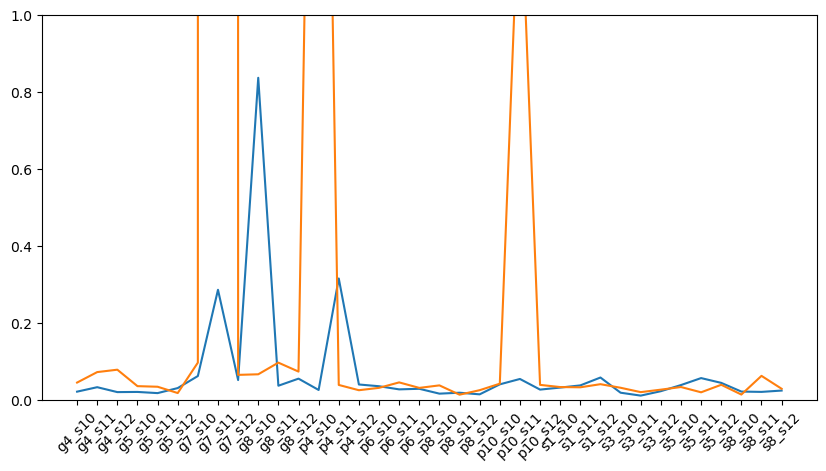

In [27]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(g_df["filename"],g_df["model_range"],label="model_range")
ax.plot(g_df["filename"],g_df["acc_range"],label="acc_range")

ax.set_ylim(0,1)
plt.xticks(rotation=45)

plt.show()

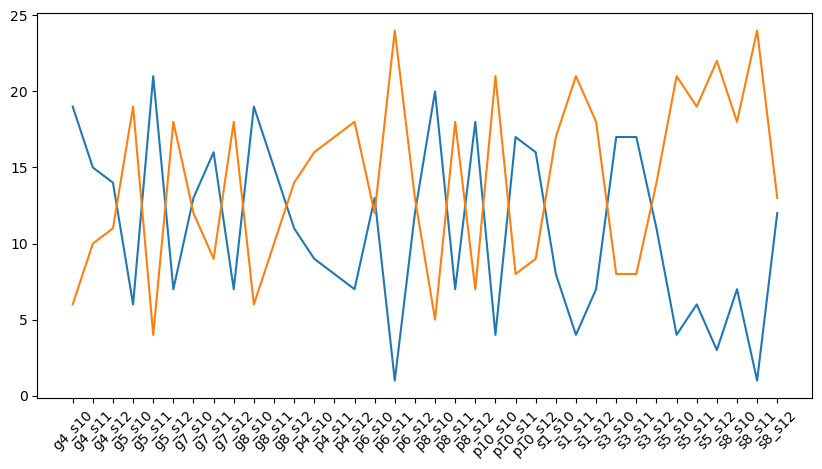

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(g_df["filename"],g_df["model_closer"],label="model_mean")
ax.plot(g_df["filename"],g_df["acc_closer"],label="acc_mean")

#ax.set_ylim(0,0.1)
plt.xticks(rotation=45)

plt.show()

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_14128\181238426.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  g_df.mean()


model_range          0.069794
acc_range           14.784874
model_mean_error     0.008402
model_std_error      0.015925
model_abs_error      0.029835
model_outliers       0.111111
model_closer        10.888889
acc_mean_error      -0.845611
acc_std_error        3.151258
acc_abs_error        0.926179
acc_outliers         0.138889
acc_closer          14.111111
dtype: float64